In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Info & Structure

In [20]:
print("SHAPE:",df.shape)
df.info()

SHAPE: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


check missing values in dataset

In [16]:
display(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 check and Remove Duplicate Records

In [22]:
a = df.duplicated().sum()
print("DUPLICATE ROW:",a)
# drop reow with missing values
df.dropna(inplace=True)

DUPLICATE ROW: 0


 Standardize  Text Datz

In [4]:
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].replace({'male':'Male','female':'Female'})
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
# Convert Data Types 
print(df.columns)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['customerid'] = df['customerid'].astype(str)
df['age'] = df['age'].astype(int)


Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')


 Final Data Check

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    object
 1   gender                  200 non-null    object
 2   age                     200 non-null    int32 
 3   annual_income_(k$)      200 non-null    int64 
 4   spending_score_(1-100)  200 non-null    int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 7.2+ KB


,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


=>Gender Distribution

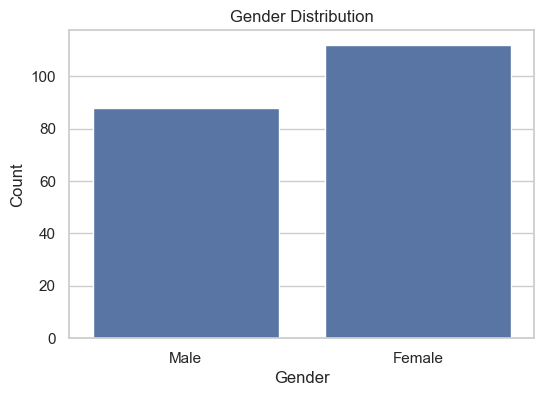

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set a clean style
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


=> Age vs Spending Score

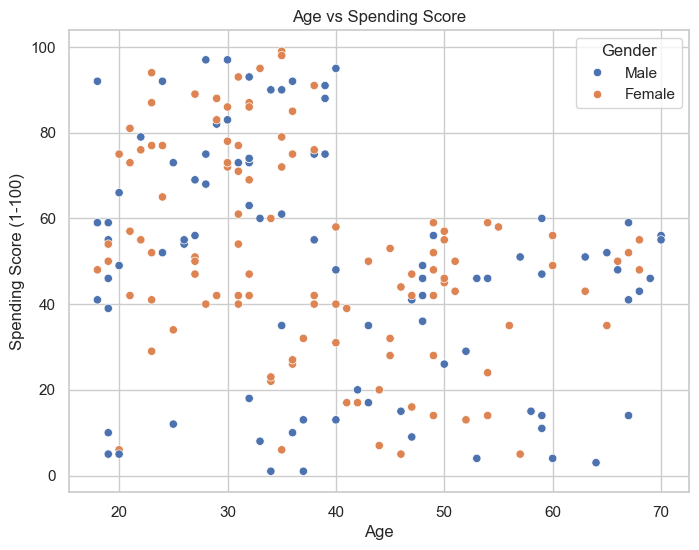

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='spending_score_(1-100)', hue='gender')
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Gender")
plt.show()
